In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy as pt
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [2]:
url = 'https://github.com/qymera0/dncPython/blob/main/estatAvan/diamonds.csv?raw=true'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info

<bound method DataFrame.info of        Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

       

In [6]:
df = df.drop('Unnamed: 0', axis = 1)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


1. Qual é a média da variável 'carat'?

Média da variável Carat é 0.797940

In [10]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


2. Qual é a correlação entre as variáveis 'price' e 'deph'?
-0.010647

In [11]:
# Separar somente as variáveis numéricas
dfNum = df.select_dtypes(include = 'number').drop('price', axis = 1)

In [12]:
# Função para o escalonamento das variáveis contínuas

def feat_scale(X):

  # Calcular a média de todas as variáveis
  mu = np.mean(X, axis = 0)

  # Calcular o devio padrão de todas as variáveis
  sigma = np.std(X, axis=0, ddof=1)

  # Fazer os escalonamento das variáveis
  xNorm = (X - mu)/sigma

  return xNorm

In [13]:
# Escalonamento das variáveis
dfNum = feat_scale(dfNum)

In [14]:
dfNum.describe()

,carat,depth,table,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.149807e-16,-4.002434e-15,1.175017e-16,2.508108e-16,-2.107654e-17,-2.023348e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.261446e+00,-1.308748e+01,-6.470013e+00,-5.109073e+00,-5.020884e+00,-5.014510e+00
25%,-8.395154e-01,-5.231005e-01,-6.521325e-01,-9.103164e-01,-8.882717e-01,-8.909378e-01
50%,-2.066190e-01,3.531645e-02,-2.046032e-01,-2.777527e-02,-2.147379e-02,-1.237607e-02
75%,5.106635e-01,5.239313e-01,6.904554e-01,7.210475e-01,7.052356e-01,7.103118e-01
max,8.885992e+00,1.204128e+01,1.680151e+01,4.465161e+00,4.654922e+01,4.004720e+01


3. Após o escalonamento das variáveis numéricas, qual é o valor máximo da variável ‘table’?

Valor máximo table é 16.80

In [26]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
df2 = df.select_dtypes(include = 'number').drop('price', axis = 1)

In [28]:
df2.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [36]:
scaler = StandardScaler()
scaler.fit(df2)

StandardScaler()

In [38]:
dScaled = scaler.transform(df2)

In [40]:
dfScaled = pd.DataFrame(dScaled, columns=df2.columns)

In [41]:
dfScaled.describe()

,carat,depth,table,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.444878e-16,-3.996902e-15,9.695207e-17,2.782103e-16,-8.430615e-17,-2.002271e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261458e+00,-1.308760e+01,-6.470073e+00,-5.109120e+00,-5.020931e+00,-5.014556e+00
25%,-8.395232e-01,-5.231053e-01,-6.521385e-01,-9.103248e-01,-8.882800e-01,-8.909461e-01
50%,-2.066210e-01,3.531678e-02,-2.046051e-01,-2.777553e-02,-2.147398e-02,-1.237618e-02
75%,5.106683e-01,5.239361e-01,6.904618e-01,7.210542e-01,7.052421e-01,7.103184e-01
max,8.886075e+00,1.204139e+01,1.680167e+01,4.465203e+00,4.654965e+01,4.004758e+01


In [42]:
# Separar somente as variáveis categóricas
dfCat = df.loc[:, ~df.columns.isin(dfNum.columns)].drop('price', axis = 1)

In [43]:
# Transforma as variáveis de text em 'categorias'
dfCat = dfCat.astype('category')

In [44]:
dfCat = pd.get_dummies(dfCat, drop_first = True)

In [45]:
dfCat.shape

(53940, 17)

4. Após a ‘dummyficação’ das variáveis categóricas, quantas colunas existem em um dataset com somente variáveis desse tipo?
 
 Existem 17 colunas

Text(0, 0.5, 'Frequência')

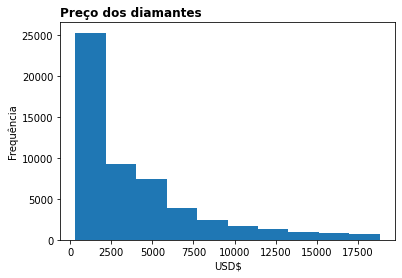

In [46]:
# Histograma da variável 'price'
fig = plt.figure()

plt.hist(df['price'])

plt.title('Preço dos diamantes', loc = 'left', fontweight = 'bold')

plt.xlabel('USD$')

plt.ylabel('Frequência')

In [47]:
# Teste de normalidade
kStat, kPvalue = stats.kstest(df['price'], cdf = 'norm')

In [48]:
print('Estatística de teste:', kStat, "\n", 'p-value:', kPvalue)

Estatística de teste: 1.0 
 p-value: 0.0


5. A distribuição da resposta ‘price’ é normal e não precisa ser transformada.
   
Falso, não é normal

In [98]:
# Concatenar todos os dados
dfFull = pd.concat([dfNum, dfCat, df['price']], axis = 1)

In [99]:
dfFull.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,-1.198157,-0.174090,-1.099662,-1.587823,-1.536181,-1.571115,0,1,0,0,...,0,0,0,0,1,0,0,0,0,326
1,-1.240350,-1.360726,1.585514,-1.641310,-1.658759,-1.741159,0,0,1,0,...,0,0,0,1,0,0,0,0,0,326
2,-1.198157,-3.384987,3.375631,-1.498677,-1.457382,-1.741159,1,0,0,0,...,0,0,0,0,0,1,0,0,0,327
3,-1.071577,0.454129,0.242926,-1.364959,-1.317293,-1.287708,0,0,1,0,...,1,0,0,0,0,0,1,0,0,334
4,-1.029384,1.082348,0.242926,-1.240155,-1.212227,-1.117663,1,0,0,0,...,0,1,0,0,1,0,0,0,0,335


In [106]:
X = dfFull.drop(columns=['price'])
y = dfFull['price']

In [120]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 123456)

In [121]:
xTest.shape

(10788, 23)

In [122]:
xTrain.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [110]:
# Ajustar o modelo
reg1 = sm.OLS(np.log(yTrain), xTrain)
reg1fit = reg1.fit()
print(reg1fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          2.282e+05
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                        0.00
Time:                        08:53:54   Log-Likelihood:                         -46402.
No. Observations:               43152   AIC:                                  9.285e+04
Df Residuals:                   43129   BIC:                                  9.305e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [125]:
# Determinação do VIF para o modelo ajustado
pd.DataFrame({'Variaveis': xTrain.columns[1:],
              'VIF': [variance_inflation_factor(xTrain.values, i+1) for i in range(len(xTrain.columns[1:]))]})

,Variaveis,VIF
0,depth,1.637548
1,table,1.733099
2,x,50.903022
3,y,16.911481
4,z,20.058741
5,cut_Good,3.545674
6,cut_Ideal,14.663382
7,cut_Premium,8.828986
8,cut_Very Good,7.835732
9,color_E,2.330532


x com 50.903022

Questão 9 - Após remover todas as variáveis para manter os VIF´s em no máximo 5, quantas variáveis sobraram no modelo? OBS: desconsidere o intercept. (Dica, comece removendo, uma por uma, as variáveis com maior VIF)

In [119]:
# Variáveis para 'dropar'
var = ['x', 'clarity_SI1', 'z', 'cut_Ideal', 'carat']

In [127]:
# Cálculo do VIF
pd.DataFrame({'Variaveis': xTrain.drop(var, axis = 1).columns[1:],
              'VIF': [variance_inflation_factor(xTrain.drop(var, axis = 1).values, i+1) for i in range(len(xTrain.drop(var, axis = 1).columns[1:]))]})

,Variaveis,VIF
0,table,1.492011
1,y,1.278163
2,cut_Good,1.342069
3,cut_Premium,1.864756
4,cut_Very Good,1.565396
5,color_E,1.582478
6,color_F,1.592906
7,color_G,1.793429
8,color_H,1.511438
9,color_I,1.358039


In [88]:
# # Função para escrever a fórmula
# def ols_formula(df, dependent_var, *excluded_rows):

#   # Listar o nome das colunas do dataframe
#   dfCols = list(df.columns.values)

#   # Remover a variável dependente
#   dfCols.remove(dependent_var)

#   # Remover as variáveis excluídas
#   for col in excluded_rows:
#     dfCols.remove(col)

#   # Retornar a fórmula
#   return dependent_var + ' ~ ' + ' + '.join(dfCols)

In [89]:
# ols_formula(dfFull, 'price')

'price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_VeryGood + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [90]:
# # Renomear a coluna 'cut_Very Good' para remover o espaço
# dfFull = dfFull.rename(columns={'cut_Very Good' : 'cut_VeryGood'})

In [91]:
# Criação da matriz do modelo
# y, X = pt.dmatrices(ols_formula(dfFull, 'price'), data = dfFull , return_type='dataframe')

In [92]:
# Separação dos datasets
# xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 123456)

In [93]:
# # Reset index
# xTrain.reset_index(drop=True, inplace=True)
# xTest.reset_index(drop=True, inplace=True)
# yTrain.reset_index(drop=True, inplace=True)
# yTest.reset_index(drop=True, inplace=True)

In [94]:
# xTest.shape

(10788, 24)

In [95]:
# xTest.columns

Index(['Intercept', 'carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_VeryGood', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

6. Ao separar o dataset em dois pedaços, o de treinamento e o de teste, quantas linhas possuirá o dataset de teste? (Utilize uma proporção de 20% e argumento random_state = 123456) Dica: concatene os datasets e faça a matriz do modelo antes de fazer a separação entre treinamento e teste.

10788

In [67]:
# # Ajustar o modelo
# reg1 = sm.OLS(np.log(yTrain), xTrain)
# reg1fit = reg1.fit()
# print(reg1fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 5.655e+04
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:39:51   Log-Likelihood:                 12290.
No. Observations:               43152   AIC:                        -2.453e+04
Df Residuals:                   43128   BIC:                        -2.432e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.1184      0.009    782.126   

7. Utilizando o método dos mínimos quadrados e ajustando o modelo com o logaritmo natural da resposta ‘price’ e os dados de ajuste, qual é a variável que tem o maior valor para a estatística ‘t’. (OBS: desconsidere o ‘intercept’).

205.705

In [68]:
# Determinação do VIF para o modelo ajustado
pd.DataFrame({'Variaveis': xTrain.columns[1:],
              'VIF': [variance_inflation_factor(xTrain.values, i+1) for i in range(len(xTrain.columns[1:]))]})

,Variaveis,VIF
0,carat,21.714137
1,depth,1.712892
2,table,1.783268
3,x,50.908609
4,y,16.921473
5,z,20.059420
6,cut_Good,3.943117
7,cut_Ideal,11.397405
8,cut_Premium,8.408910
9,cut_VeryGood,7.698138
